# Computational Structural Design II - Mesh Datastructure II

### Learning Goal: 
- Mesh and half-edge data structure
- How to solve topological questions
- Mesh Attributes


### Content:
- A. Half-edge Datastucture
- B. Topology: Vertex, Face, Edge
- C. Mesh Attributes
- D. Exercise: Running Bund Barrel Vault

---


# A. Mesh and Half-Edge Datastructure

## A_1. COMPAS Mesh and Half-edge Datastructure
A mesh can be constructed from vertex and face information. However, how can we answer the **topological questions**? </br>
e.g. Which vertices are connected with vertex 4? Which faces are surrounding vertex 4? 

<img src="../Tutorial5/img/week5_2.png" width="500" style="margin-left:auto; margin-right:auto"/>
</br>

We will first generate the polygon mesh in the last tutorial. 

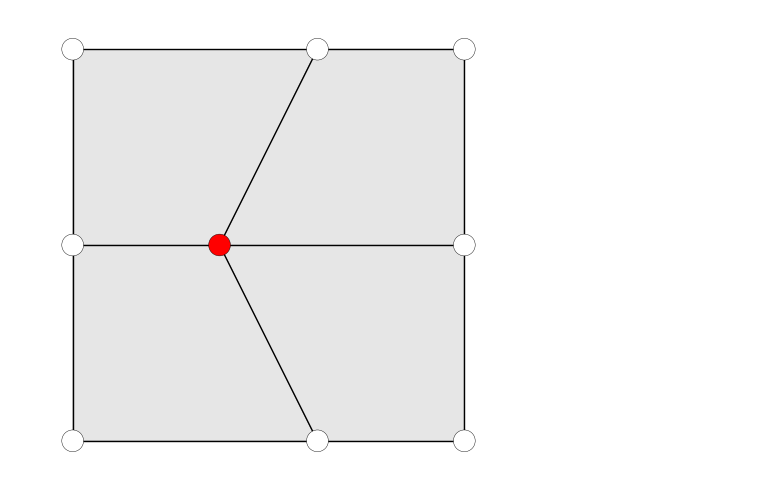

In [1]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
# show vertex labels
# show edge labels
# show face labels

plotter.zoom_extents()
plotter.show()

In COMPAS, meshes are presented using a half-edge data structure. In a half-edge data structure, each **edge** is composed of **a pair of half-edge twins** that point at opposite orientations. 

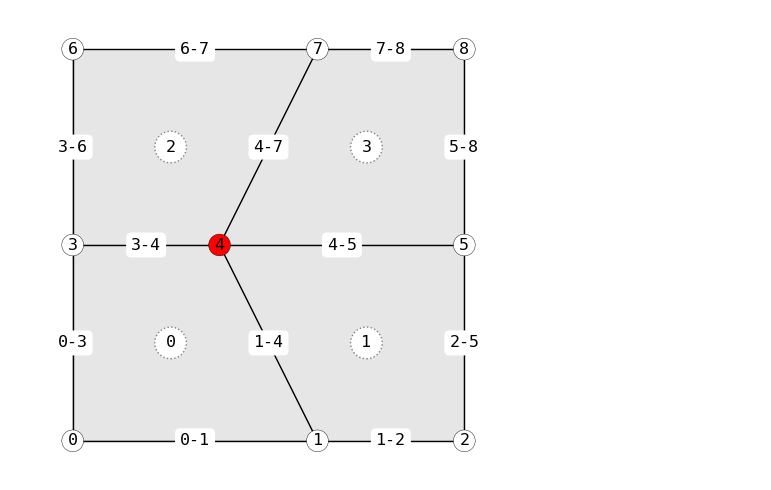

In [3]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()
# show halfedges

plotter.zoom_extents()
plotter.show()

`mesh.half_edge` tells the half edge information. A vertex stores a reference to a half-edge that originates from that vertex, and the face that half-edge belongs to. For an edge on the boundary, one of the half-edge pairs belongs to an non-existing `None` face.

| u | v | fkey |
| :---: | :---: | :---: |
| 0 | 1 | 0 |
|   | 3 | None |
| 1 | 0 | None |
|   | 4 | 0 |
|   | 2 | 1 |
| 2 | 1 | None |
|   | 5 | 1 |
| 3 | 4 | 2 |
|   | 0 | 0 |
|   | 6 | None |
| 4 | 1 | 1 |
|   | 3 | 0 |
|   | 5 | 3 |
|   | 7 | 2 |
| 5 | 2 | None |
|   | 4 | 1 |
|   | 8 | 3 |
| 6 | 7 | None |
|   | 3 | 2 |
| 7 | 4 | 3 |
|   | 6 | 2 |
|   | 8 | None |
| 8 | 5 | None |
|   | 7 | 3 |

In [6]:
print(mesh.halfedge) # get halfedge information

{0: {1: 0, 3: None}, 1: {0: None, 4: 0, 2: 1}, 2: {1: None, 5: 1}, 3: {4: 2, 0: 0, 6: None}, 4: {1: 1, 3: 0, 5: 3, 7: 2}, 5: {2: None, 4: 1, 8: 3}, 6: {7: None, 3: 2}, 7: {4: 3, 6: 2, 8: None}, 8: {5: None, 7: 3}}


Find the half-edges whose corresponding faces are `None` and not `None`. Assign different colors to them. 

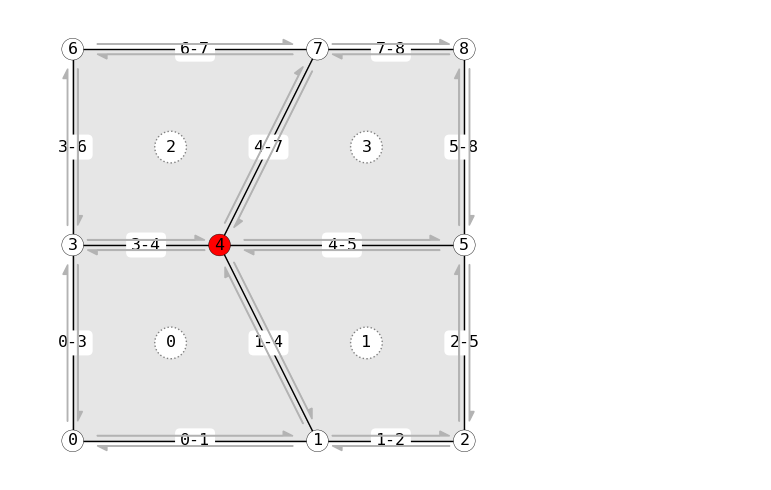

In [4]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vertex_color = {4: (1.0, 0.0, 0.0)}
halfedge_color = {}

for u, v in mesh.edges():
    # add your code here
    pass

plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_edgelabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(color=halfedge_color)
plotter.zoom_extents()
plotter.show()

## A_2. Twin, Next, and Previous Half-edges

In the Polygon, the line segments form a continuous cycle, connecting the vertices in order. These directed line segments are called half-edge. If an edge is shared by two faces, it can be decomposed into 2 twin half-edges, which have the opposite directions and each face can have a half-edge. The half-edge adjacencies define the connectivity of faces. 


<img src="https://files.gitbook.com/v0/b/gitbook-legacy-files/o/assets%2F-M730QpQnbAMvz44bqhc%2F-MOH3yDnBEO8NEXs8leP%2F-MOHIkRqhipSVWxsGy4m%2Fimage.png?alt=media&token=b585d605-e4c7-4689-935d-5b6623fe679d" width="500" style="margin-left:auto; margin-right:auto"/>
</br>


### A_2a. Twin Half-Edges
With a pair of twin half-edges, the two faces share the edge can be found.

Find the twin half-edges between vertex `4` and vertex `7`, and the faces.

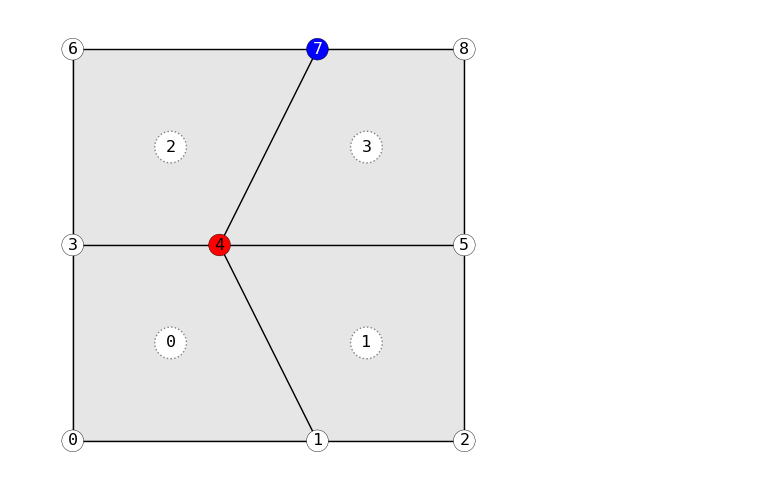

In [10]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

u, v = 4, 7
vertex_color = {u: (1.0, 0.0, 0.0), v: (0.0, 0.0, 1.0)}

halfedges = []
face_color = {}
halfedge_color = {}


plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
# meshartist.draw_halfedges(halfedges=halfedges, color=halfedge_color)
plotter.zoom_extents()
plotter.show()

### A_2a. Next Half-Edges
Using the half-edges, we can easily find the vertices that are connected with the current half edges. However, the half-edge uses a dictionary to store the information, these neighbouring vertices are not in the cycling order of the faces. 

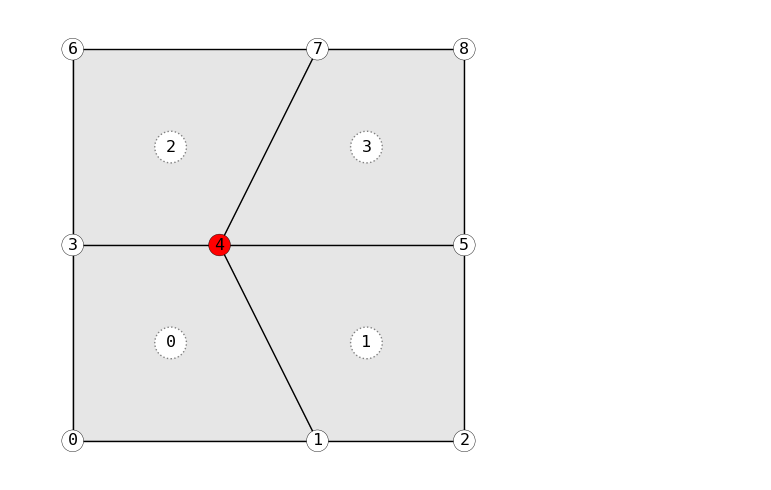

In [11]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = 4

vertex_color = {vkey: (1.0, 0.0, 0.0)}
edge_color = {}
edge_width = {}

# find neighbour of a vertex

plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

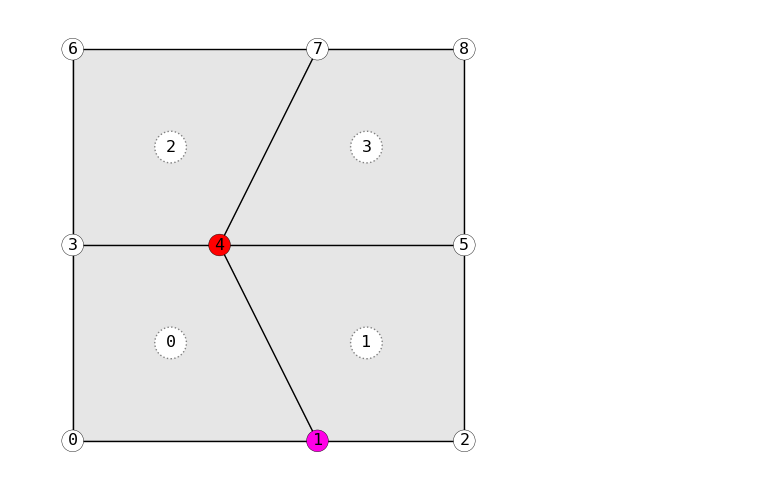

In [15]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = 4

vertex_color = {vkey: (1.0, 0.0, 0.0)}

halfedges = []

# your code here...

plotter = Plotter()
meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
# meshartist.draw_halfedges(halfedges=halfedges, color=(1.0, 0.0, 0.0))
plotter.zoom_extents()
plotter.show()

---

# B. Topology
## B1. Vertex
### B1_a. Vertex Neighbours

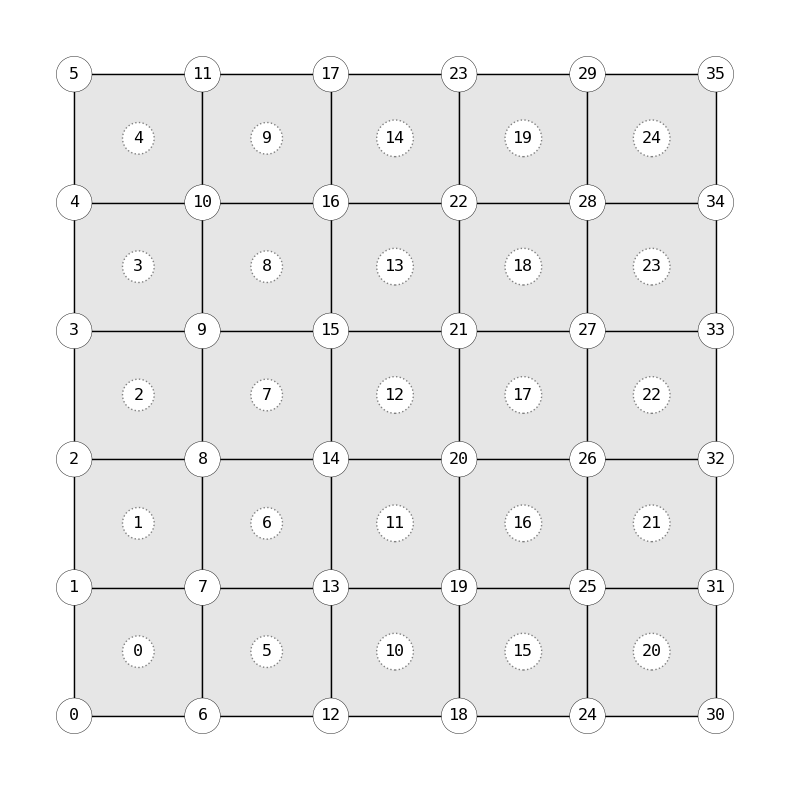

In [19]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

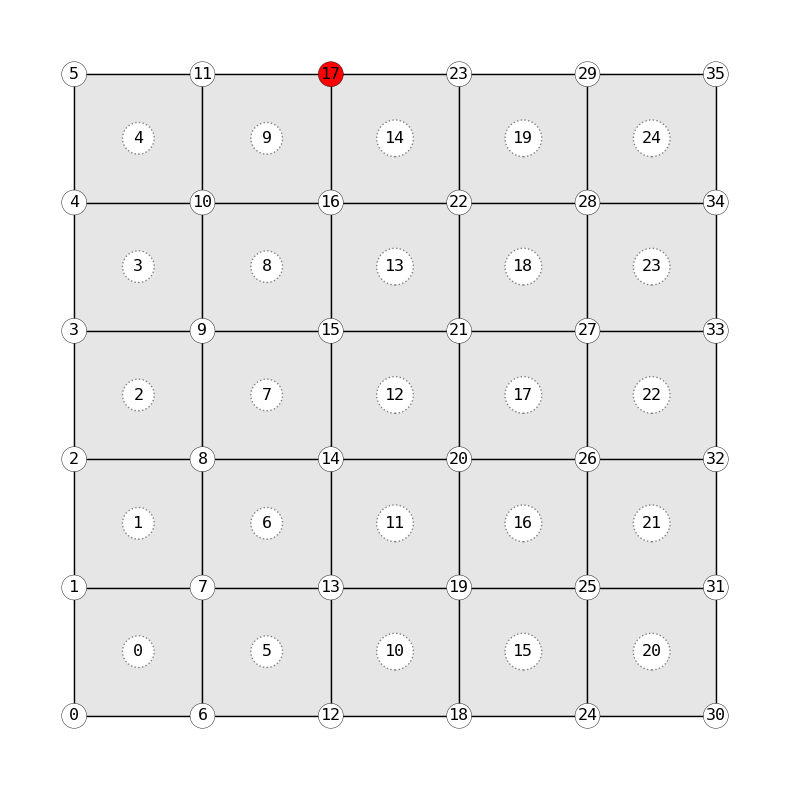

In [17]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex neighbours
# vkey = 20
vkey = mesh.get_any_vertex()
# YOUR CODE HERE

# # visualization
# vertex_color = {vkey: (1.0, 0.0, 0.0)}
# edge_color = {}
# edge_width = {}

# for v_nbr in v_nbrs:
#     vertex_color[v_nbr] = (1.0, 0.9, 0.9)
#     edge_color[(vkey, v_nbr)] = (1.0, 0.0, 0.0)
#     edge_width[(vkey, v_nbr)] = 2.0

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B1_b. Vertex Degree
In mesh, the degree (or valency) of a vertex is the number of edges that are incident to the vertex.  The maximum degree of a mesh, and the minimum degree of a mesh, are the maximum and minimum of its vertices' degrees. 

In [21]:
from compas.datastructures import Mesh

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

vkey = mesh.get_any_vertex()

# vertex degree
# YOUR CODE HERE

vertex 15 degree 4


Color the vertices based on its vertex degree. The vertex with the highest degree should be red, while the vertex with the lowest degree should be white. 

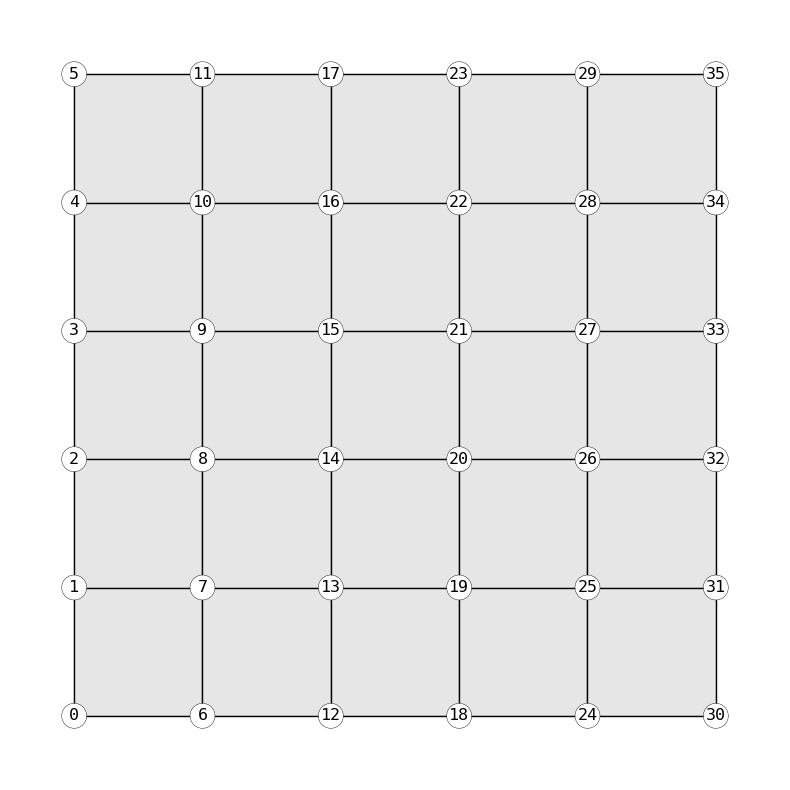

In [22]:
from compas.datastructures import Mesh
from compas_plotters import Plotter
from compas.utilities import i_to_red

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# visualization
vertex_text = {}
vertex_color = {}

# YOUR CODE HERE....

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color)
meshartist.draw_vertexlabels(text=vertex_text)
# meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

The vertex degrees can be used to find supports.

In [25]:
from compas.datastructures import Mesh
from compas.geometry import Sphere
from compas_notebook.app import App

mesh = Mesh.from_json("https://raw.githubusercontent.com/BlockResearchGroup/CSD2_2022/main/3_Materialization/Tutorial5/data/simple_dome.json")

viewer = App()

for vkey in mesh.vertices():
    # check the vertex degree... 
    pass

viewer.add(mesh)
viewer.show()

### B1_c. Vertex Faces

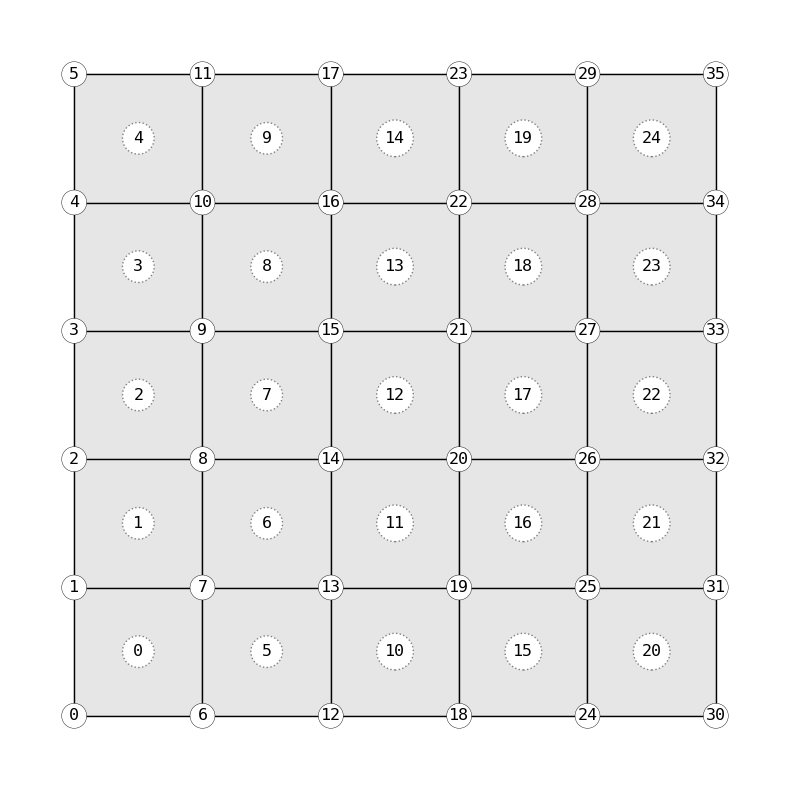

In [26]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex faces
# vkey = 20
vkey = mesh.get_any_vertex()
# YOUR CODE HERE

# # visualization
# vertex_color = {vkey: (1.0, 0.0, 0.0)}
# face_color = {f_nbr: (0.7, 0.7, 1.0) for f_nbr in f_nbrs}

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, vertexcolor=vertex_color, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B1_d. Vertex Area
Compute the tributary area of a vertex. Tributary area is often used to estimate design loads of structural elements subjected to vertical surface loading. 

In [109]:
from compas.datastructures import Mesh

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find vertex tributary area

vertex 33 area 0.5


## B2. Face
### B2_a. Face Neighbours¶

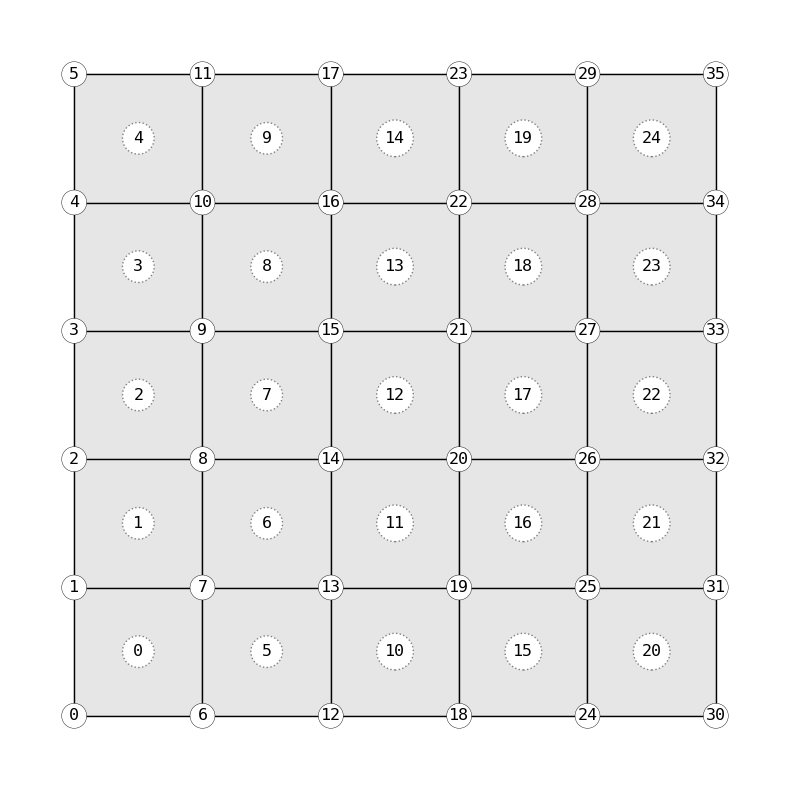

In [27]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find face neighbours
# fkey = 15
fkey = mesh.get_any_face()
# ADD YOUR CODE HERE...

# # visualization
# face_color = {}
# face_color[fkey] = (1.0, 0.7, 0.7)
# for f_nbr in f_nbrs:
#     face_color[f_nbr] = (0.7, 0.7, 1.0)

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, facecolor=face_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

### B2_b. Face Degree

Color the face based on its face degree. The face with the highest degree should be green, while the one with the lowest degree should be white.


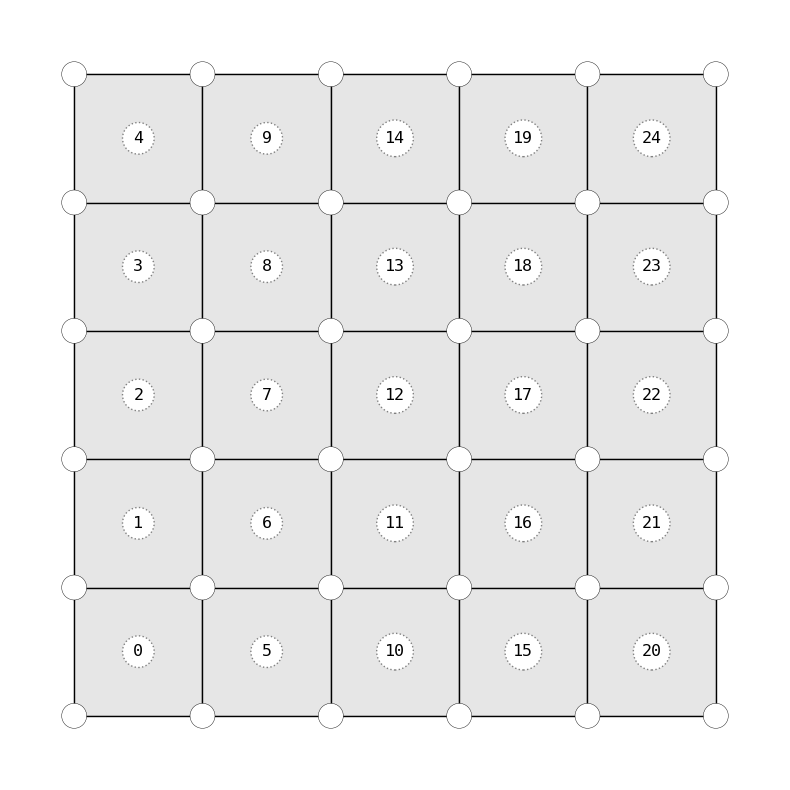

In [28]:
from compas.datastructures import Mesh
from compas_plotters import Plotter
from compas.utilities import i_to_green

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# visualization
face_text = {}
face_color = {}
# YOUR CODE HERE....

# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, facecolor=face_color)
# meshartist.draw_vertexlabels()
meshartist.draw_facelabels(text=face_text)
plotter.zoom_extents()
plotter.show()

## B3. Edges
The edge-related topological questions are prone to certain mesh topology. In this chapter we use only quad mesh. 

### B3_a. Edge Loop

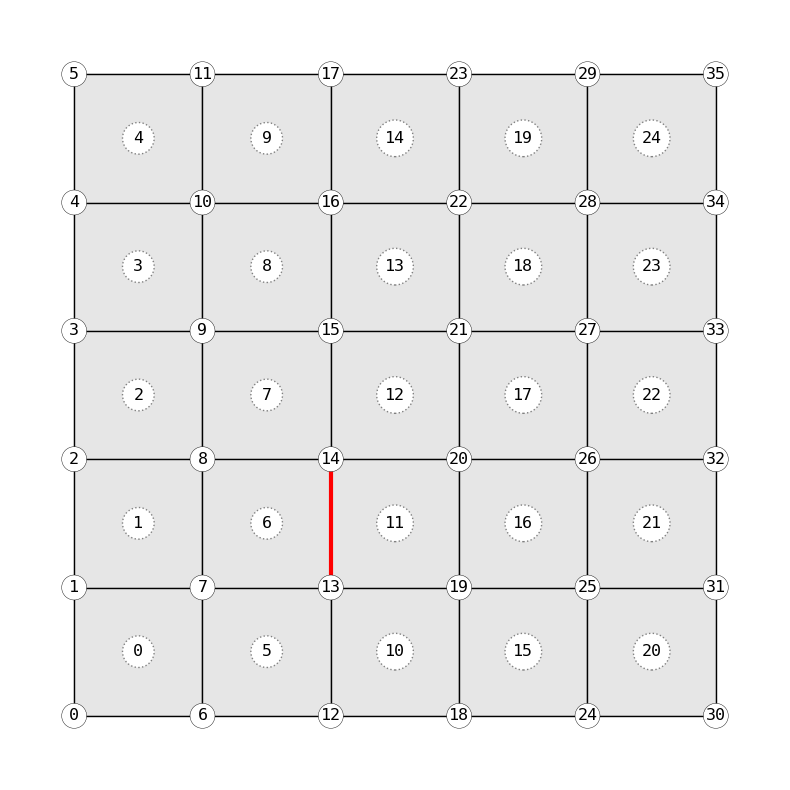

In [29]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
# YOUR CODE HERE

# visualization
edge_color = {}
edge_width = {}

# for edge in loop: 
#     edge_color[edge] = (1.0, 0.7, 0.7)
#     edge_width[edge] = 2.0

edge_color[start_edge] = (1.0, 0.0, 0.0)
edge_width[start_edge] = 3.0
    
# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

In [31]:
from compas.geometry import Point, Line
from compas.datastructures import Mesh
from compas_notebook.app import App

mesh = Mesh.from_obj('data/tubemesh.obj')
mesh.flip_cycles()

viewer = App()
viewer.add(mesh) # add the mesh before lines

vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
# YOUR CODE HERE 

# for edge in loop:
#     a, b = mesh.edge_coordinates(*edge)
#     line = Line(a, b)
#     viewer.add(line, linecolor=(0, 1.0, 0))

viewer.show()

### B3_b. Edge Strip

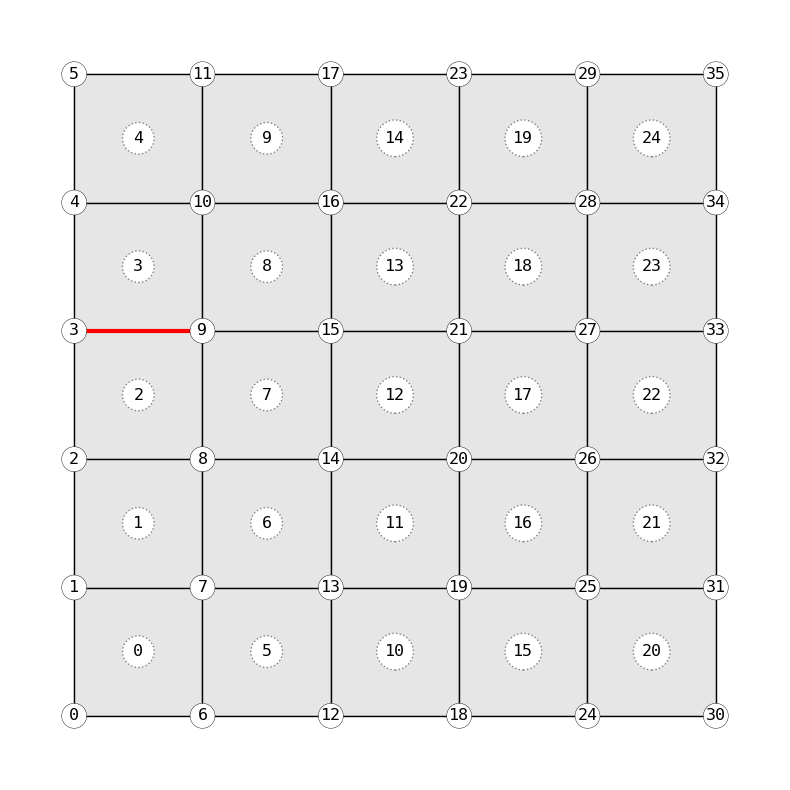

In [33]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
# YOUR CODE HERE...

# visualization
edge_color = {}
edge_width = {}

# for edge in strip: 
#     edge_color[edge] = (1.0, 0.7, 0.7)
#     edge_width[edge] = 2.0

edge_color[start_edge] = (1.0, 0.0, 0.0)
edge_width[start_edge] = 3.0
    
# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
plotter.zoom_extents()
plotter.show()

In [191]:
from compas.geometry import Point, Line
from compas.datastructures import Mesh
from compas_notebook.app import App

mesh = Mesh.from_obj('data/tubemesh.obj')
mesh.flip_cycles()

viewer = App()
viewer.add(mesh) # add the mesh before lines

vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
# YOUR CODE HERE...

# for edge in strip:
#     a, b = mesh.edge_coordinates(*edge)
#     line = Line(a, b)
#     viewer.add(line, linecolor=(0, 1.0, 0))

viewer.show()

### B3_c. Half-Edge Strip

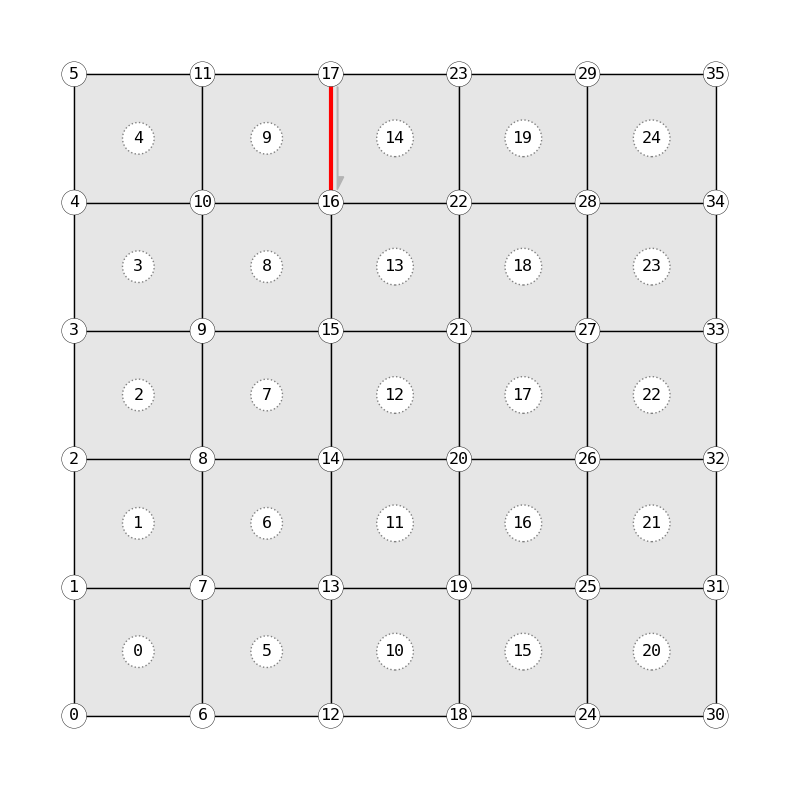

In [34]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

# create mesh grid
mesh = Mesh.from_meshgrid(dx=5, nx=5)

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
# YOUR CODE HERE...

# visualization
edge_color = {}
edge_width = {}

# for edge in strip: 
#     edge_color[edge] = (1.0, 0.7, 0.7)
#     edge_width[edge] = 2.0

edge_color[start_edge] = (1.0, 0.0, 0.0)
edge_width[start_edge] = 3.0
    
# plotter
plotter = Plotter(figsize=(8, 8))
meshartist = plotter.add(mesh, vertexsize=3.5, edgecolor=edge_color, edgewidth=edge_width)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()
meshartist.draw_halfedges(halfedges=[start_edge])
plotter.zoom_extents()
plotter.show()

### B3_d. Color Quadmesh Stripes
Along the edge loop, color the staggered stripes.

In [40]:
from math import radians
import compas
from compas.geometry import Point, Line
from compas.datastructures import Mesh

from compas_notebook.app import App

mesh = Mesh.from_obj('data/tubemesh.obj')
mesh.flip_cycles()

viewer = App()
viewer.add(mesh) # add the mesh before lines

# find edge loop
# start_edge = 21, 27
vkey = mesh.get_any_vertex()
vkey_nbr = mesh.vertex_neighbors(vkey)[0]
start_edge = vkey, vkey_nbr
loop = mesh.edge_loop(start_edge)

for edge in loop:
    a, b = mesh.edge_coordinates(*edge)
    line = Line(a, b)
    viewer.add(line, linecolor=(0, 1.0, 0))

facecolors = {face: (0.7, 0.7, 0.7) for face in mesh.faces()}

# YOUR CODE HERE...

viewer.add(mesh, facecolor=facecolors)

viewer.show()


---
# C. Attributes

## C_1. Extract Attributes
We extract attributes of vertices, faces and edges while iterate through the mesh.

In [41]:
from compas.datastructures import Mesh

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

for vkey in mesh.vertices():
    print(vkey)
    
for fkey in mesh.faces():
    print(fkey)
    
for edge in mesh.edges():
    print(edge)

0
1
2
3
4
5
6
7
8
0
1
2
3
(0, 1)
(0, 3)
(1, 4)
(1, 2)
(2, 5)
(3, 4)
(3, 6)
(4, 5)
(4, 7)
(5, 8)
(6, 7)
(7, 8)


`Mesh.vertices_where`, `Mesh.faces_where` and `Mesh.edges_where` can find elements of the mesh under a specific or a set of conditions.

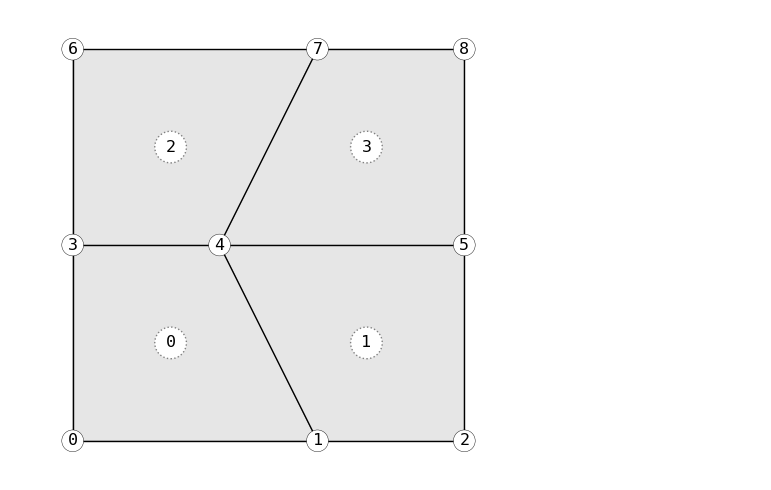

In [42]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

# find vertices
# YOUR CODE HERE...

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

## C_2. Modify Attributes

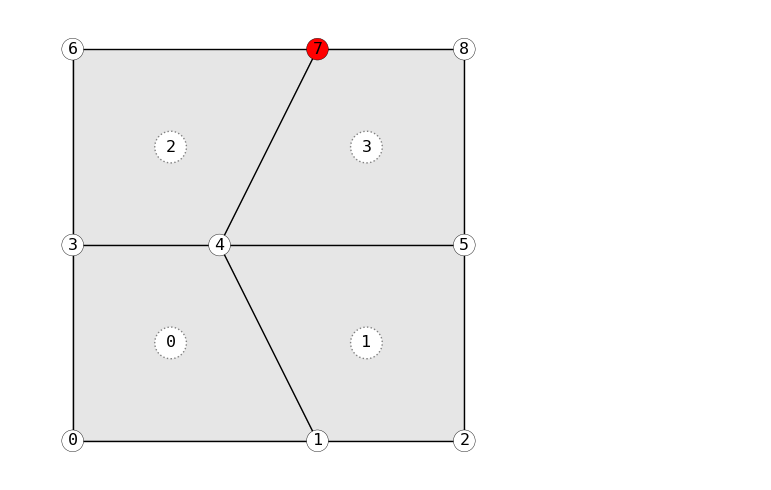

In [43]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

vkey = mesh.get_any_vertex()

# modify x, y coordinates
# YOUR CODE HERE...

vertex_color = {vkey: (1.0, 0.0, 0.0)}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

## C3. Update Attributes

In [44]:
from compas.datastructures import Mesh

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)

# update attributes
# YOUR CODE HERE...

for vkey, attr in mesh.vertices(data=True):
    print(vkey, attr)
    
for fkey, attr in mesh.faces(data=True):
    print(fkey, attr)
    
for edge, attr in mesh.edges(data=True):
    print(edge, attr)

0 {'x': 0, 'z': 0, 'y': 0}
1 {'x': 2.5, 'z': 0, 'y': 0}
2 {'x': 4, 'z': 0, 'y': 0}
3 {'x': 0, 'z': 0, 'y': 2}
4 {'x': 1.5, 'z': 0, 'y': 2}
5 {'x': 4, 'z': 0, 'y': 2}
6 {'x': 0, 'z': 0, 'y': 4}
7 {'x': 2.5, 'z': 0, 'y': 4}
8 {'x': 4, 'z': 0, 'y': 4}
0 {}
1 {}
2 {}
3 {}
(0, 1) {}
(0, 3) {}
(1, 4) {}
(1, 2) {}
(2, 5) {}
(3, 4) {}
(3, 6) {}
(4, 5) {}
(4, 7) {}
(5, 8) {}
(6, 7) {}
(7, 8) {}


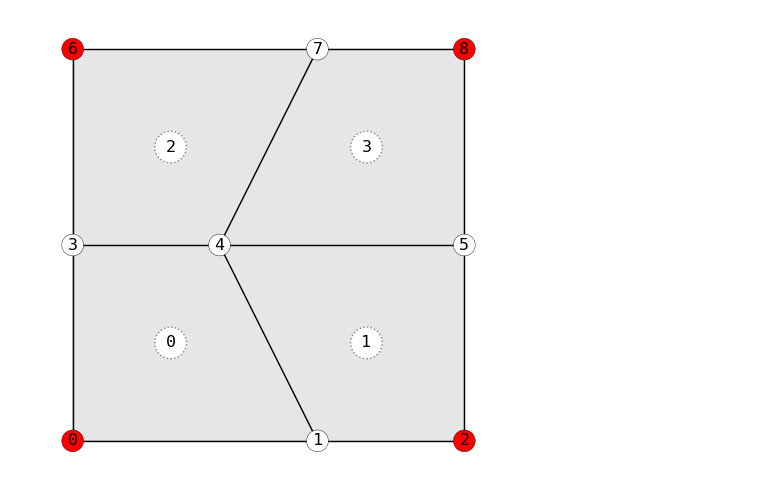

In [48]:
from compas.datastructures import Mesh
from compas_plotters import Plotter

vertices = [[0, 0, 0], [2.5, 0, 0], [4, 0, 0],
         [0, 2, 0], [1.5, 2, 0], [4, 2, 0],
         [0, 4, 0], [2.5, 4, 0], [4, 4, 0]]

faces = [[0, 1, 4, 3], [1, 2, 5, 4], [3, 4, 7, 6], [4, 5, 8, 7]]

mesh = Mesh.from_vertices_and_faces(vertices, faces)
# mesh = mesh.subdivide(scheme='quad')

mesh.update_default_vertex_attributes({"fixed": False})

for vkey in mesh.vertices():
    vertex_degree = mesh.vertex_degree(vkey)
    if vertex_degree == 2:
        mesh.vertex_attribute(vkey, 'fixed', True)

fixed_vertices = list(mesh.vertices_where({'fixed': True}))
# mesh.smooth_centroid(fixed=fixed_vertices)

vertex_color = {vkey: (1.0, 0.0, 0.0) for vkey in fixed_vertices}

plotter = Plotter()

meshartist = plotter.add(mesh, vertexsize=1, vertexcolor=vertex_color)
meshartist.draw_vertexlabels()
meshartist.draw_facelabels()

plotter.zoom_extents()
plotter.show()

# D. Exercise: Running Bund Barrel Vault

## D1_a. Find Short Boundary

In [49]:
from compas.datastructures import Mesh
from compas.geometry import Line
from compas_notebook.app import App

mesh= Mesh.from_obj("data/barrel_vault.obj")
mesh = mesh.subdivide(scheme='quad')

viewer=App()
viewer.add(mesh)

# find a corner vertex


# find vertex neighbours


# find two boundary loops


# find the shorter boundary loop


viewer.show()
